#### 打卡汇总

| 任务名称                          | 难度 | 所需技能 |
| --------------------------------- | ---- | -------- |
| PyTorch张量计算与Numpy的转换      | 低   | PyTorch  |
| 梯度计算和梯度下降过程            | 低   | PyTorch  |
| PyTorch全连接层原理和使用         | 中   | PyTorch  |
| PyTorch激活函数原理和使用         | 低   | PyTorch  |
| PyTorch卷积层原理和使用           | 中   | PyTorch  |
| PyTorch常见的损失函数和优化器使用 | 中   | PyTorch  |
| PyTorch池化层和归一化层           | 中   | PyTorch  |
| 使用PyTorch搭建VGG网络            | 高   | PyTorch  |
| 使用PyTorch搭建ResNet网络         | 高   | PyTorch  |
| 使用PyTorch完成Fashion-MNIST分类  | 高   | PyTorch  |
| 使用PyTorch完成人脸关键点检测     | 高   | PyTorch  |
| 使用PyTorch搭建对抗生成网络       | 高   | PyTorch  |

#### 任务1：PyTorch张量计算与Numpy的转换

任务要点：Pytorch基础使用、张量计算

- 步骤1：配置本地Notebook环境

- 步骤2：学习Pytorch的基础语法，并成功执行以下代码

In [1]:
import numpy as np
import torch

c = np.ones((3, 3))
d = torch.from_numpy(c)

In [2]:
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


**任务2：梯度计算和梯度下降过程**

任务要点：Pytorch梯度计算、随机梯度下降

- 步骤1：学习自动求梯度原理，https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

- 步骤2：学习随机梯度下降原理，https://www.cnblogs.com/BYRans/p/4700202.html

- 步骤3：

    - 使用numpy创建一个 [y=10*x+b+noise(0,1)](#)的数据，其中x是0到100的范围，以0.01进行等差数列
    - 使用pytroch定义w和b，并使用随机梯度下降，完成回归拟合。

In [138]:
import random

true_w, true_b = 10, 2
noise = np.random.normal(size=(10000,))
x = np.linspace(0, 100, 10000)
y = true_w * x + true_b + noise

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

lr = 1e-3
epochs = 100
N = 10000

for epoch in range(epochs):
    for i in range(1000):
        xi, yi = x[i], y[i]
        yi_hat = w * xi + b
        loss = 0.5 * (yi_hat - yi) ** 2
        loss.backward()
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
        w.grad.data.zero_()
        b.grad.data.zero_()

In [139]:
print(w)
print(b)

tensor([9.9528], requires_grad=True)
tensor([2.0815], requires_grad=True)


**任务3：PyTorch全连接层原理和使用**

任务要点：全连接网络

- 步骤1：学习全连接网络原理，https://blog.csdn.net/xiaodong_11/article/details/82015456

- 步骤2：在pytorch中使用矩阵乘法实现全连接层

- 步骤3：在pytorch中使用nn.Linear层



In [165]:
from torch import nn

class MyLinear_1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyLinear_1, self).__init__()
        self.w = torch.randn(input_dim, output_dim, requires_grad=True)
        self.b = torch.randn(output_dim, requires_grad=True)
    def forward(self, x):
        return x @ self.w + self.b

In [166]:
model = MyLinear_1(100, 10)
x = torch.randn(5, 100)
y = model(x)
print(y.shape)

torch.Size([5, 10])


In [163]:
from torch import nn

class MyLinear_2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyLinear_2, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.linear(x)

In [164]:
model = MyLinear_2(100, 10)
x = torch.randn(5, 100)
y = model(x)
print(y.shape)

torch.Size([5, 10])




**任务4：PyTorch激活函数原理和使用**

任务要点：激活函数

- 步骤1：学习激活函数的原理，https://zhuanlan.zhihu.com/p/88429934

- 步骤2：在pytorch中手动实现上述激活函数

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
# torch.nn.ELU

def elu(x, alpha=1.0):
    return max(0, x) + min(0, alpha * (np.exp(x) - 1))

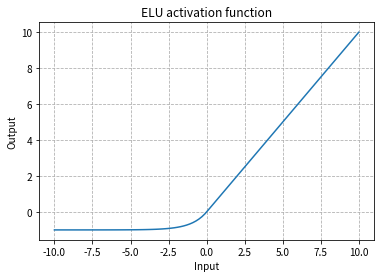

In [176]:
x = np.linspace(-10, 10, 100)
y = [elu(xi) for xi in x]
plt.plot(x, y)
plt.title('ELU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [184]:
# torch.nn.LeakyReLU

def leaky_relu(x, negative_slope=0.01):
    return max(0, x) + negative_slope * min(0, x)

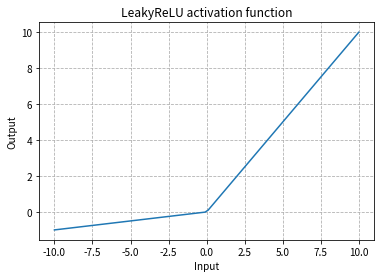

In [183]:
x = np.linspace(-10, 10, 100)
y = [leaky_relu(xi, negative_slope=0.1) for xi in x]
plt.plot(x, y)
plt.title('LeakyReLU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [185]:
# torch.nn.ReLU

def relu(x):
    return max(0, x)

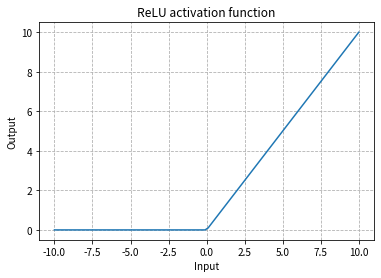

In [188]:
x = np.linspace(-10, 10, 100)
y = [relu(xi) for xi in x]
plt.plot(x, y)
plt.title('ReLU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [193]:
# torch.nn.Sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

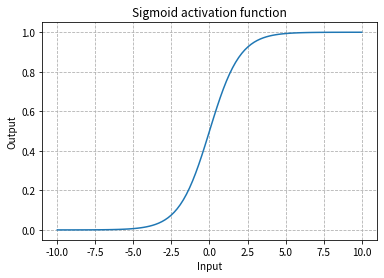

In [194]:
x = np.linspace(-10, 10, 100)
y = [sigmoid(xi) for xi in x]
plt.plot(x, y)
plt.title('Sigmoid activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [195]:
# torch.nn.LogSigmoid

def log_sigmoid(x):
    return np.log(sigmoid(x))

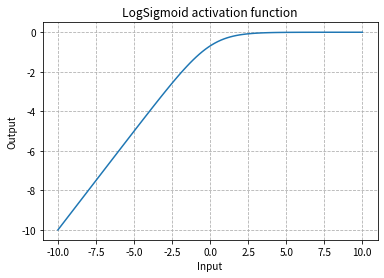

In [196]:
x = np.linspace(-10, 10, 100)
y = [log_sigmoid(xi) for xi in x]
plt.plot(x, y)
plt.title('LogSigmoid activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [197]:
# torch.nn.Tanh

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

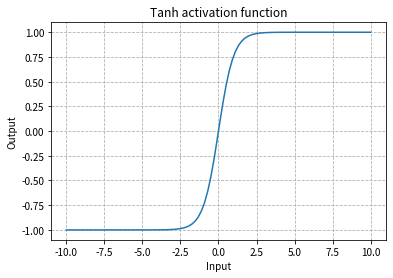

In [198]:
x = np.linspace(-10, 10, 100)
y = [tanh(xi) for xi in x]
plt.plot(x, y)
plt.title('Tanh activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [199]:
# torch.nn.Tanhshrink

def tanhshrink(x):
    return x - tanh(x)

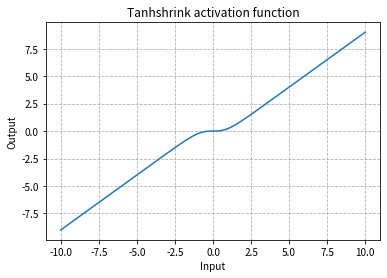

In [200]:
x = np.linspace(-10, 10, 100)
y = [tanhshrink(xi) for xi in x]
plt.plot(x, y)
plt.title('Tanhshrink activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()



**任务5：PyTorch卷积层原理和使用**

任务要点：卷积层

- 步骤1：理解卷积层的原理和具体使用

- https://blog.csdn.net/qq_37385726/article/details/81739179

- https://www.cnblogs.com/zhangxiann/p/13584415.html

- 步骤2：计算下如下卷积层的参数量
```python
nn.Conv2d(
      in_channels=1,
      out_channels=32,
      kernel_size=5,    
      stride=1, 
      padding=2)
```

参数数量：in_channels * out_channels * kernel_size * kernel_size = 800

**任务6：PyTorch常见的损失函数和优化器使用**

任务要点：损失函数、优化器

- 步骤1：学习损失函数的细节，https://www.cnblogs.com/wanghui-garcia/p/10862733.html
- 步骤2：学习优化器的使用，https://pytorch.org/docs/stable/optim.html
- 步骤3：设置不同的优化器和学习率，重复任务2的回归过程
  - 损失函数MSE、优化器SGD、学习率0.1
  - 损失函数MSE、优化器SGD、学习率0.5
  - 损失函数MSE、优化器SGD、学习率0.01

In [41]:
import torch
from torch import nn
import numpy as np
import random

true_w, true_b = 10, 2
noise = np.random.normal(size=(10000,))
x = np.linspace(0, 100, 10000)
y = true_w * x + true_b + noise

model = nn.Linear(1, 1)
loss_fn = nn.MSELoss()
optimizer_1 = torch.optim.SGD(model.parameters(), lr=0.1)
optimizer_2 = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer_3 = torch.optim.SGD(model.parameters(), lr=0.001)

In [42]:
def train(model, x, y, optimizer, epochs):
    nn.init.xavier_uniform_(model.weight)
    nn.init.zeros_(model.bias)
    total_loss = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        inputs = torch.from_numpy(x).view(-1, 1).float()
        outputs = torch.from_numpy(y).view(-1, 1).float()
        predicts = model(inputs)
        loss = loss_fn(predicts, outputs)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=10, norm_type=2)
        optimizer.step()
        total_loss.append(loss.item())
    return total_loss

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_xy(model, x, y):
    with torch.no_grad():
        y_pred = model(torch.from_numpy(x).view(-1, 1).float()).detach().numpy()
    plt.plot(x, y_pred, label='true')
    plt.plot(x, y, 'ro', label='predict')
    plt.title('Linear Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
def plot_loss(loss):
    i = range(len(loss))
    plt.plot(i, loss)
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

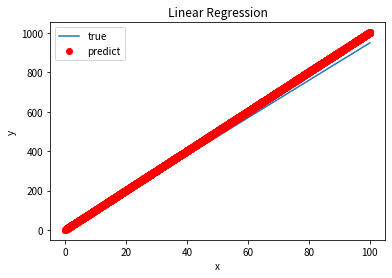

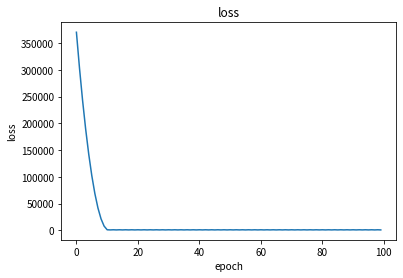

In [51]:
loss_1 = train(model, x, y, optimizer_1, epochs=100)
plot_xy(model, x, y)
plot_loss(loss_1)

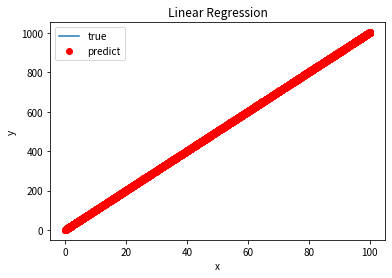

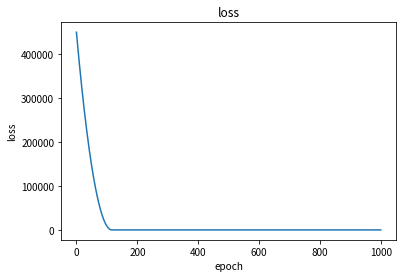

In [52]:
loss_2 = train(model, x, y, optimizer_2, epochs=1000)
plot_xy(model, x, y)
plot_loss(loss_2)

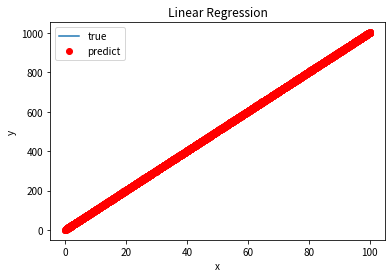

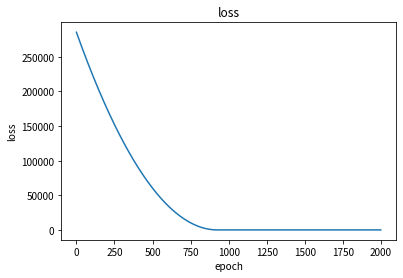

In [53]:
loss_3 = train(model, x, y, optimizer_3, epochs=2000)
plot_xy(model, x, y)
plot_loss(loss_3)

**任务7：PyTorch池化层和归一化层**

任务要点：池化层、归一化层

- 步骤1：使用pytroch代码实现2d pool中的mean-pooling、max-pooling
  - https://pytorch.org/docs/stable/nn.html#pooling-layers

  - https://blog.csdn.net/shanglianlm/article/details/85313924

- 步骤2：学习归一化的原理，https://blog.csdn.net/qq_23981335/article/details/106572171

In [346]:
import torch

def pool2d(inputs, kernel_size, stride=None, padding=0, mode='mean'):
    height, width = inputs.shape
    if isinstance(kernel_size, int):
        kernel_height = kernel_width = kernel_size
    else:
        kernel_height, kernel_width = kernel_size
    if stride is None:
        stride_height, stride_width = kernel_height, kernel_width
    elif isinstance(stride, int):
        stride_height = stride_width = stride
    else:
        stride_height, stride_width = stride
    if isinstance(padding, int):
        padding_height = padding_width = padding
    else:
        padding_height, padding_width = padding
    
    outputs_height = (height + 2 * padding_height - kernel_height) // stride_height + 1
    outputs_width = (width + 2 * padding_width - kernel_width) // stride_width + 1
    
    padding_top = torch.zeros(padding_height, width)
    padding_left = torch.zeros(height + 2 * padding_height, padding_width)
    inputs = torch.cat((padding_top, inputs, padding_top), dim=0)
    inputs = torch.cat((padding_left, inputs, padding_left), dim=1)
    
    outputs = torch.zeros(outputs_height, outputs_width)
    
    for x in range(0, inputs.shape[0]-kernel_height+1, stride_height):
        for y in range(0, inputs.shape[1]-kernel_width+1, stride_width):
            inputs_part = inputs[x:x+kernel_height, y:y+kernel_width]
            i, j = x // stride_height, y // stride_width
            if mode == 'mean':
                outputs[i, j] = torch.mean(inputs_part)
            elif mode == 'max':
                outputs[i, j] = torch.max(inputs_part)
    return outputs 

In [347]:
inputs = torch.randint(1, 10, size=(6,6))
outputs = pool2d(inputs, kernel_size=3, stride=1, mode='mean')

In [348]:
inputs, outputs

(tensor([[4, 3, 3, 4, 2, 1],
         [2, 9, 3, 3, 4, 5],
         [6, 1, 6, 8, 5, 7],
         [5, 1, 4, 6, 5, 2],
         [1, 4, 1, 4, 3, 7],
         [2, 7, 8, 8, 2, 4]]),
 tensor([[4.1111, 4.4444, 4.2222, 4.3333],
         [4.1111, 4.5556, 4.8889, 5.0000],
         [3.2222, 3.8889, 4.6667, 5.2222],
         [3.6667, 4.7778, 4.5556, 4.5556]]))

In [349]:
outputs = pool2d(inputs, kernel_size=(2,3), stride=(1,2), padding=1, mode='mean')

In [350]:
inputs, outputs

(tensor([[4, 3, 3, 4, 2, 1],
         [2, 9, 3, 3, 4, 5],
         [6, 1, 6, 8, 5, 7],
         [5, 1, 4, 6, 5, 2],
         [1, 4, 1, 4, 3, 7],
         [2, 7, 8, 8, 2, 4]]),
 tensor([[1.1667, 1.6667, 1.1667],
         [3.0000, 4.1667, 3.1667],
         [3.0000, 5.0000, 5.3333],
         [2.1667, 4.3333, 5.5000],
         [1.8333, 3.3333, 4.5000],
         [2.3333, 5.3333, 4.6667],
         [1.5000, 3.8333, 2.3333]]))